Original shape: (150, 4)
Transformed shape: (150, 2)


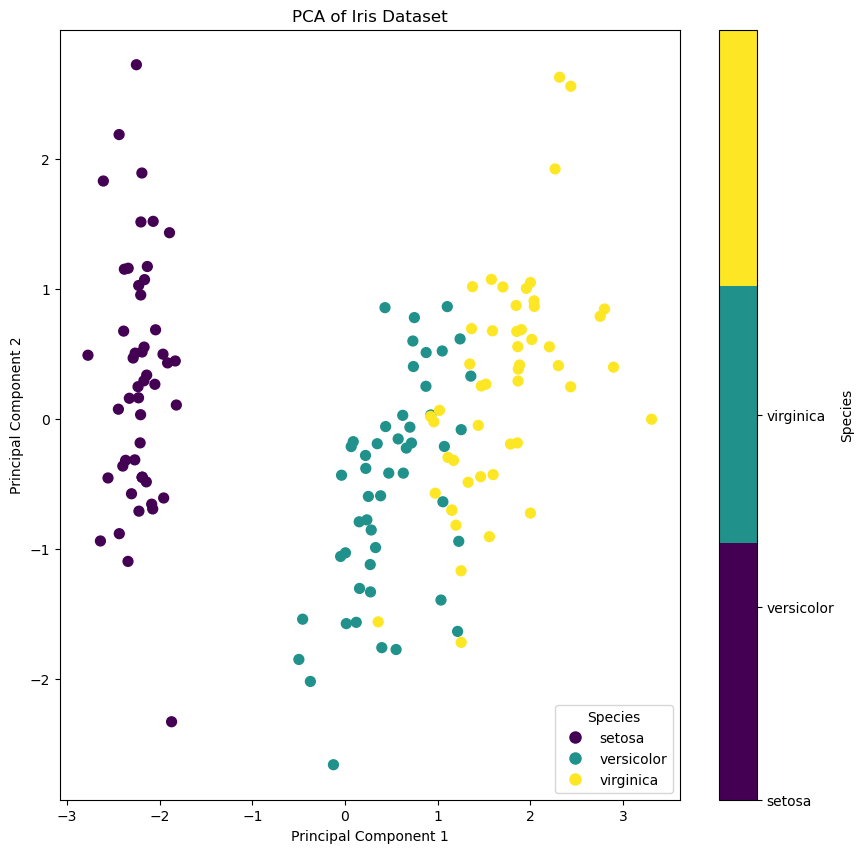

Explained variance by each component: [0.72770452 0.23030523]


In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("IRIS_DATASET.csv")

# Define feature columns and target column
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
targetcolumn = 'species'

# Extract features and target from the dataframe
x = df[features].values
y = df[targetcolumn].values

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Perform PCA
pca_model = PCA(n_components=2)
x_pca = pca_model.fit_transform(x_scaled)

# Check the shape of the transformed data
print(f"Original shape: {x.shape}")
print(f"Transformed shape: {x_pca.shape}")

# Create a mapping of species to integers
species_mapping = {species: idx for idx, species in enumerate(np.unique(y))}
# Map the target values to integers
y_mapped = np.array([species_mapping[species] for species in y])

# Define the colormap
cmap = plt.get_cmap('viridis', len(species_mapping))

# Plotting the PCA results
plt.figure(figsize=(10, 10))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_mapped, cmap=cmap, s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset")

# Create a legend manually with specific colors
handles = []
for species, idx in species_mapping.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(idx / len(species_mapping)), markersize=10, label=species))

plt.legend(handles=handles, title='Species')

# Colorbar to show the color mapping
cbar = plt.colorbar(scatter)
cbar.set_label('Species')
cbar.set_ticks(np.linspace(0, 1, len(species_mapping)))
cbar.set_ticklabels(list(species_mapping.keys()))

plt.show()

# Explained variance
explained_variance = pca_model.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("IRIS_DATASET.csv")

x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df['species'].values

xscaled = StandardScaler().fit_transform(x)

xpca = PCA(n_components=2).fit_transform(xscaled)

ynumeric = pd.factorize(y)[0]  

# Plot PCA results with colors based on species
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=ynumeric, cmap='viridis', s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset")
plt.show()


NameError: name 'x_pca' is not defined

Actual shape of the dataset: (150, 4)
Transformed shape of the dataset: (150, 2)


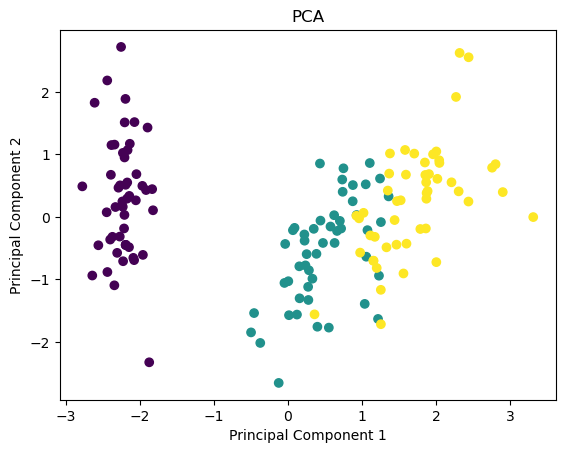

In [41]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('IRIS_DATASET.csv')

x = df.iloc[:,:-1]
y = df.iloc[:, -1]

print(f"Actual shape of the dataset: {x.shape}")

xscaled = StandardScaler().fit_transform(x)
pca = PCA(n_components = 2)
xpca = pca.fit_transform(xscaled)

print(f"Transformed shape of the dataset: {xpca.shape}")

ynumeric = pd.factorize(y)[0]

plt.scatter(xpca[:,:-1], xpca[:,-1], c=ynumeric, cmap = 'viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()